In [1]:
import numpy as np
import pandas as pd

In [61]:
## thesis specific import ##
import sys
import imp
import seaborn as sns
sys.path.append('./src/')
import doc_utils
import feature_utils

In [83]:
imp.reload(doc_utils)  

<module 'doc_utils' from './src/doc_utils.py'>

In [84]:
doc_path_list = doc_utils.get_labeled_files()
doc_obj_list = doc_utils.get_doc_objects(doc_path_list)

tmp/lamedbet21_l.docx
tmp/nun2_l.docx
tmp/aingimel3_l.docx
tmp/alefsameh3_l.docx


In [85]:
doc_db_columns = ['path','file_name','client_tag','therapist_tag','num_par']

In [86]:
par_db_columns = ['doc_idx','text','par_type','is_nar','nar_idx','nar_len']
par_db = pd.DataFrame(columns=par_db_columns)
par_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len


In [87]:
doc_db = pd.DataFrame(columns=doc_db_columns)

for path in doc_path_list:
    print (path)
    doc_utils.add_doc_to_db(path,doc_db)

tmp/lamedbet21_l.docx
tmp/lamedbet21_l.docx
tmp/nun2_l.docx
tmp/nun2_l.docx
tmp/aingimel3_l.docx
tmp/aingimel3_l.docx
tmp/alefsameh3_l.docx
tmp/alefsameh3_l.docx


In [88]:
doc_db

,path,file_name,client_tag,therapist_tag,num_par
0,tmp/lamedbet21_l.docx,lamedbet21_l.docx,לבקל,לבמט,450
1,tmp/nun2_l.docx,nun2_l.docx,נקל,נמט,166
2,tmp/aingimel3_l.docx,aingimel3_l.docx,עגקל,עגמט,229
3,tmp/alefsameh3_l.docx,alefsameh3_l.docx,סאקל,סאמט,275


In [89]:
par_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len


In [103]:
imp.reload(doc_utils)  
par_db = pd.DataFrame(columns=par_db_columns)
par_db.iloc[:,1:] = par_db.iloc[:,1:].astype('int32')

for doc_idx in doc_db.index:
    doc_utils.add_paragraphs_to_db(doc_idx,doc_db,par_db)

skipping for doc 0 entry 0 type no_mark text  CLIENT
skipping for doc 0 entry 1 type no_mark text  THERAPIST
skipping for doc 0 entry 2 type no_mark text התחל
skipping for doc 0 entry 3 type no_mark text שפה עב
skipping for doc 0 entry 5 type segment text סגמנט 1
update nar 0 len to 7
skipping for doc 0 entry 64 type segment text דקה 5 – סגמנט 2
update nar 1 len to 7
update nar 2 len to 6
skipping for doc 0 entry 111 type segment text דקה 10 – סגמנט 3
update nar 3 len to 5
skipping for doc 0 entry 159 type segment text דקה 15 – סגמנט 4
update nar 4 len to 9
skipping for doc 0 entry 189 type segment text דקה 20 – סגמנט 5
update nar 5 len to 1
skipping for doc 0 entry 232 type segment text דקה 25 – סגמנט 6 יש בזה משהו אני אני אדם של כאילו גם חברים שלי חושבים שאני קצת ילדותי בקטע הזה
skipping for doc 0 entry 293 type segment text דקה 30 – סגמנט 7
update nar 6 len to 44
update nar 7 len to 7
skipping for doc 0 entry 329 type segment text  דקה 35 – סגמנט 8
update nar 8 len to 3
skipping for

In [104]:
par_db.describe()

,doc_idx,is_nar,nar_idx,nar_len,idx_in_nar
count,1112.000000,1112.000000,227.000000,227.000000,227.000000
mean,1.283273,0.204137,4.436123,4.511013,7.000000
std,1.223005,0.403251,3.495777,4.517773,9.627578
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,0.000000,4.000000,3.000000,4.000000
75%,2.000000,0.000000,6.000000,6.000000,8.000000
max,3.000000,1.000000,13.000000,16.000000,43.000000


In [105]:
par_db= doc_utils.add_length_of_paragraphs(par_db)

In [106]:
par_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len
0,0.000000,CLIENT,no_mark,0.000000,NaN,NaN,NaN,7
1,0.000000,THERAPIST,no_mark,0.000000,NaN,NaN,NaN,10
2,0.000000,התחל,no_mark,0.000000,NaN,NaN,NaN,4
3,0.000000,שפה עב,no_mark,0.000000,NaN,NaN,NaN,6
4,0.000000,משתתפים קליינט מטפל,therapist,0.000000,NaN,NaN,NaN,22
...,...,...,...,...,...,...,...,...
1107,3.000000,יש לך את הדקות בשביל ה,therapist,0.000000,NaN,NaN,NaN,23
1108,3.000000,את הזה השאלון,client,0.000000,NaN,NaN,NaN,15
1109,3.000000,סיום\n,no_mark,0.000000,NaN,NaN,NaN,6
1110,3.000000,,no_mark,0.000000,NaN,NaN,NaN,0


In [107]:
par_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 1111
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   doc_idx     1112 non-null   float64
 1   text        1112 non-null   object 
 2   par_type    1112 non-null   object 
 3   is_nar      1112 non-null   float64
 4   nar_idx     227 non-null    float64
 5   nar_len     227 non-null    float64
 6   idx_in_nar  227 non-null    float64
 7   par_len     1112 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 110.5+ KB


In [108]:
par_db.describe()

,doc_idx,is_nar,nar_idx,nar_len,idx_in_nar,par_len
count,1112.000000,1112.000000,227.000000,227.000000,227.000000,1112.000000
mean,1.283273,0.204137,4.436123,4.511013,7.000000,87.724820
std,1.223005,0.403251,3.495777,4.517773,9.627578,172.734105
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000
50%,1.000000,0.000000,4.000000,3.000000,4.000000,30.000000
75%,2.000000,0.000000,6.000000,6.000000,8.000000,91.000000
max,3.000000,1.000000,13.000000,16.000000,43.000000,1841.000000


In [109]:
par_db.loc[par_db['nar_idx']==1]

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len
81,0.000000,אין מה לעשות שם בצפון אין מה לעשות שם בעיר באר...,therapist,1.000000,1.000000,1.000000,0.000000,172
82,0.000000,כן,therapist,1.000000,1.000000,1.000000,1.000000,2
83,0.000000,ברור אבל אין מה לעשות עשיתי טעות,client,1.000000,1.000000,1.000000,2.000000,32
84,0.000000,למה טעות,therapist,1.000000,1.000000,1.000000,3.000000,8
85,0.000000,כי עשיתי טעות שאחרי שבוע שאני מכיר בן אדם אני ...,client,1.000000,1.000000,1.000000,4.000000,158
86,0.000000,שתלכו ביחד,therapist,1.000000,1.000000,1.000000,5.000000,10
87,0.000000,שאנחנו נחזור וכאילו חזרנו אבל זה לא באמת חזרנו...,client,1.000000,1.000000,1.000000,6.000000,94
463,1.000000,אני חושב שבעבודה היה עיקר הקושי אה פשוט אה אני...,client,1.000000,1.000000,1.000000,0.000000,1494
467,1.000000,שאתה אחד מהם,therapist,1.000000,1.000000,1.000000,1.000000,12
468,1.000000,שאני הצטרפתי אליהם זתומרת אנחנו שלושה אמ ו אמ...,client,1.000000,1.000000,1.000000,2.000000,1719


In [37]:
par_db.loc[par_db['par_type']=='no_mark']

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len
2,0.000000,התחל,no_mark,0.000000,NaN,NaN,NaN,4
3,0.000000,שפה עב,no_mark,0.000000,NaN,NaN,NaN,6
446,0.000000,סיום,no_mark,0.000000,NaN,NaN,NaN,4
447,0.000000,דקה 4730,no_mark,0.000000,NaN,NaN,NaN,8
448,0.000000,,no_mark,0.000000,NaN,NaN,NaN,0
449,0.000000,,no_mark,0.000000,NaN,NaN,NaN,0
454,1.000000,,no_mark,0.000000,NaN,NaN,NaN,0
455,1.000000,התחל,no_mark,0.000000,NaN,NaN,NaN,5
456,1.000000,שפהעב,no_mark,0.000000,NaN,NaN,NaN,6
464,1.000000,,no_mark,0.000000,NaN,NaN,NaN,0


In [110]:
par_db.loc[par_db['is_nar']==1]

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len
35,0.000000,היה אמור להיות לי ראיון אבל כאילו ב10 היה אמור...,client,1.000000,0.000000,6.000000,0.000000,76
36,0.000000,היום,therapist,1.000000,0.000000,6.000000,1.000000,4
37,0.000000,לא לא ביום שלישי,client,1.000000,0.000000,6.000000,2.000000,16
38,0.000000,אה אוקיי,therapist,1.000000,0.000000,6.000000,3.000000,8
39,0.000000,ו זהו הייתי כבר כאילו באתי עם המון ציפיות וזה ...,therapist,1.000000,0.000000,6.000000,4.000000,257
...,...,...,...,...,...,...,...,...
1050,3.000000,מה באמת נראה לו,therapist,1.000000,12.000000,6.000000,4.000000,16
1051,3.000000,אמרתי לו שאני נורא מצטערת ונראה לי שהוא קצת מ...,client,1.000000,12.000000,6.000000,5.000000,204
1055,3.000000,כן כאילו הוא היה לי באמת אמרתי לך לקחתי קצת ...,client,1.000000,13.000000,3.000000,0.000000,580
1056,3.000000,ככה הוא אמר לך,therapist,1.000000,13.000000,3.000000,1.000000,15


<AxesSubplot:xlabel='par_type', ylabel='count'>

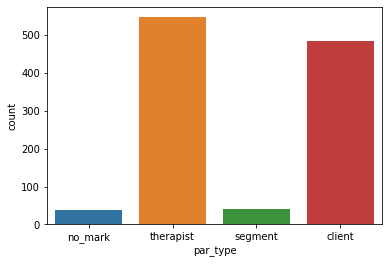

In [111]:
sns.countplot(x='par_type',data=par_db)

<AxesSubplot:xlabel='is_nar', ylabel='count'>

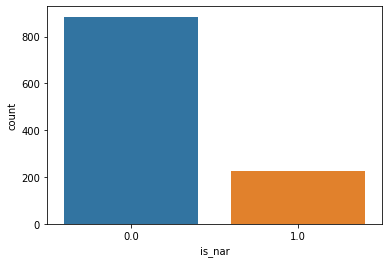

In [112]:
sns.countplot(x='is_nar',data=par_db)

<AxesSubplot:xlabel='nar_len', ylabel='Count'>

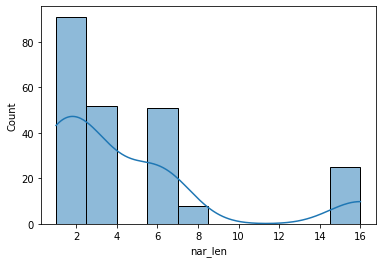

In [113]:
sns.histplot(x='nar_len',data=par_db, kde=True)

In [357]:
par_db.groupby(by='is_nar').mean()

,doc_idx,nar_idx,nar_len,idx_in_nar,par_len
is_nar,,,,,
0.000000,1.266667,NaN,NaN,NaN,64.255367
1.000000,1.348018,4.436123,4.511013,7.000000,179.224670


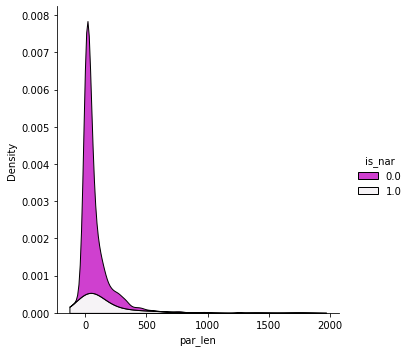

In [358]:
# sns.countplot(x='par_len',data=par_db,hue='is_nar')
sns.displot(data=par_db, x="par_len", hue="is_nar", multiple="stack", kind="kde",palette="light:m_r")

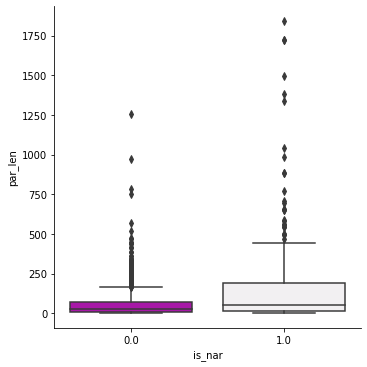

In [359]:
sns.catplot(data=par_db, x="is_nar", y="par_len", kind="box",palette="light:m_r")

<AxesSubplot:xlabel='par_len', ylabel='nar_len'>

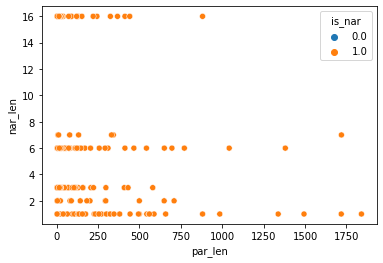

In [360]:
sns.scatterplot(data=par_db, x="par_len", y="nar_len", hue="is_nar")

total data len: 1112
len train: 834, len test: 278
['10', '14', '20', '30', 'xxx', 'אבא', 'אגיד', 'אה', 'אהיה', 'אומרים', 'אומרת', 'אונס', 'אוקי', 'אוקיי', 'איזשהו', 'איזשהי', 'איתי', 'איתך', 'איתם', 'אלי']
['חברה', 'חברים', 'חודשיים', 'חוויה', 'חוזר', 'חושבים', 'חייב', 'חמור', 'חן', 'חסר', 'חשבתי', 'ידעתי', 'יחסים', 'יחסית', 'ילד', 'ילדה', 'יצא', 'ירד', 'ישר', 'כאילו']
['10', 'אמרה', 'במשרד', 'החוזה', 'והכל', 'יחסים', 'לספר', 'מכיר', 'נשמע', 'שאולי']


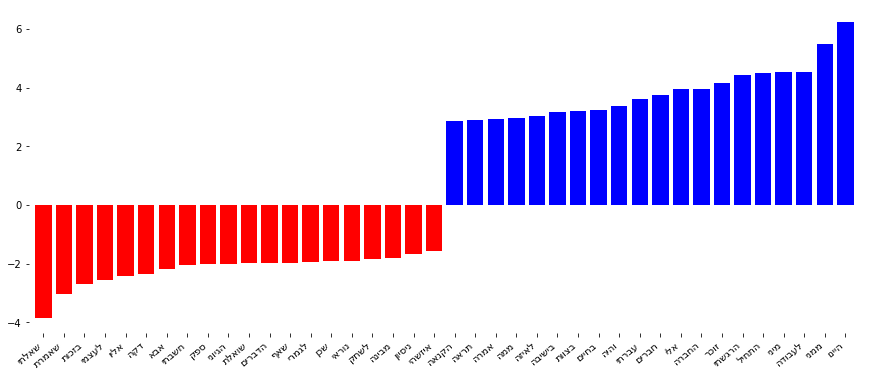

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       221
         1.0       0.38      0.11      0.16        57

    accuracy                           0.78       278
   macro avg       0.59      0.53      0.52       278
weighted avg       0.72      0.78      0.73       278



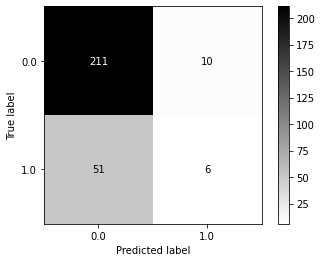

In [361]:
doc_utils.run_model(par_db)

## Adding features - previous 1,2 paragraphs

In [362]:
par_db['one_before_is_nar']=par_db['is_nar'].shift(periods=1, fill_value=0)
par_db['two_before_is_nar']=par_db['is_nar'].shift(periods=2, fill_value=0)
par_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len,one_before_is_nar,two_before_is_nar
0,0.000000,CLIENT,no_mark,0.000000,NaN,NaN,NaN,7,0.000000,0.000000
1,0.000000,THERAPIST,no_mark,0.000000,NaN,NaN,NaN,10,0.000000,0.000000
2,0.000000,התחל,no_mark,0.000000,NaN,NaN,NaN,4,0.000000,0.000000
3,0.000000,שפה עב,no_mark,0.000000,NaN,NaN,NaN,6,0.000000,0.000000
4,0.000000,משתתפים קליינט מטפל,therapist,0.000000,NaN,NaN,NaN,22,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1107,3.000000,יש לך את הדקות בשביל ה,therapist,0.000000,NaN,NaN,NaN,23,0.000000,0.000000
1108,3.000000,את הזה השאלון,client,0.000000,NaN,NaN,NaN,15,0.000000,0.000000
1109,3.000000,סיום\n,no_mark,0.000000,NaN,NaN,NaN,6,0.000000,0.000000
1110,3.000000,,no_mark,0.000000,NaN,NaN,NaN,0,0.000000,0.000000


In [363]:
par_db[par_db['nar_idx']==1]

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len,one_before_is_nar,two_before_is_nar
81,0.000000,אין מה לעשות שם בצפון אין מה לעשות שם בעיר באר...,therapist,1.000000,1.000000,1.000000,0.000000,172,0.000000,0.000000
82,0.000000,כן,therapist,1.000000,1.000000,1.000000,1.000000,2,1.000000,0.000000
83,0.000000,ברור אבל אין מה לעשות עשיתי טעות,client,1.000000,1.000000,1.000000,2.000000,32,1.000000,1.000000
84,0.000000,למה טעות,therapist,1.000000,1.000000,1.000000,3.000000,8,1.000000,1.000000
85,0.000000,כי עשיתי טעות שאחרי שבוע שאני מכיר בן אדם אני ...,client,1.000000,1.000000,1.000000,4.000000,158,1.000000,1.000000
86,0.000000,שתלכו ביחד,therapist,1.000000,1.000000,1.000000,5.000000,10,1.000000,1.000000
87,0.000000,שאנחנו נחזור וכאילו חזרנו אבל זה לא באמת חזרנו...,client,1.000000,1.000000,1.000000,6.000000,94,1.000000,1.000000
463,1.000000,אני חושב שבעבודה היה עיקר הקושי אה פשוט אה אני...,client,1.000000,1.000000,1.000000,0.000000,1494,0.000000,1.000000
467,1.000000,שאתה אחד מהם,therapist,1.000000,1.000000,1.000000,1.000000,12,0.000000,0.000000
468,1.000000,שאני הצטרפתי אליהם זתומרת אנחנו שלושה אמ ו אמ...,client,1.000000,1.000000,1.000000,2.000000,1719,1.000000,0.000000


## Tokenize hebrew - past time and special words

In [52]:
imp.reload(doc_utils)

<module 'doc_utils' from './src/doc_utils.py'>

In [53]:
par_db['text'] = par_db['text'].apply(str)

In [54]:
random_nar_par = doc_utils.get_random_par(par_db,1)
random_nar_par

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len,one_before_is_nar,two_before_is_nar
270,0.000000,מהכיוון שלו מהכיוון שלו אני הייתי די קרוב אני ...,client,1.000000,6.000000,3.000000,17.000000,118,1.000000,1.000000


In [55]:
random_str = random_nar_par['text'].tolist()[0]
random_str

'מהכיוון שלו מהכיוון שלו אני הייתי די קרוב אני הייתי די קרוב אני זוכר נגיד ש לא יודע גם היה לנו תקשורת מאוד מאוד מוזרה '

In [56]:
import hebrew_tokenizer as ht
tokens = ht.tokenize(random_str)  # tokenize returns a generator!
for grp, token, token_num, (start_index, end_index) in tokens:
    print('{}, {}'.format(grp, token))

HEBREW, מהכיוון
HEBREW, שלו
HEBREW, מהכיוון
HEBREW, שלו
HEBREW, אני
HEBREW, הייתי
HEBREW, די
HEBREW, קרוב
HEBREW, אני
HEBREW, הייתי
HEBREW, די
HEBREW, קרוב
HEBREW, אני
HEBREW, זוכר
HEBREW, נגיד
HEBREW, ש
HEBREW, לא
HEBREW, יודע
HEBREW, גם
HEBREW, היה
HEBREW, לנו
HEBREW, תקשורת
HEBREW, מאוד
HEBREW, מאוד
HEBREW, מוזרה


## Give a try to AlphaBERT

In [57]:
from transformers import BertModel, BertTokenizerFast


In [58]:
alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
alephbert = BertModel.from_pretrained('onlplab/alephbert-base')

# if not finetuning - disable dropout
alephbert.eval()

Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(52000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [59]:
tokens = alephbert_tokenizer.tokenize(random_str)

In [60]:
tokens

['מהכ',
 '##יוון',
 'שלו',
 'מהכ',
 '##יוון',
 'שלו',
 'אני',
 'הייתי',
 'די',
 'קרוב',
 'אני',
 'הייתי',
 'די',
 'קרוב',
 'אני',
 'זוכר',
 'נגיד',
 'ש',
 'לא',
 'יודע',
 'גם',
 'היה',
 'לנו',
 'תקשורת',
 'מאוד',
 'מאוד',
 'מוזרה']

In [ ]:
alephbert.tr

## Combine numeric and non-numeric features

In [62]:
imp.reload(feature_utils)  

<module 'feature_utils' from './src/feature_utils.py'>

In [ ]:
# what features to take from text? doc2vec?
# train gensim doc2vec on my own?
# is there a pre-trained hebrew?
# take word2vec?
# what does tagged doc means? is it tag 0/1 ? (not narrative/narrative)?
# look at Jonathan's pdf lectures (file 10?)
# missing line in some doc

### Split data to train & test

In [380]:
par_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len,one_before_is_nar,two_before_is_nar
0,0.000000,CLIENT,no_mark,0.000000,NaN,NaN,NaN,7,0.000000,0.000000
1,0.000000,THERAPIST,no_mark,0.000000,NaN,NaN,NaN,10,0.000000,0.000000
2,0.000000,התחל,no_mark,0.000000,NaN,NaN,NaN,4,0.000000,0.000000
3,0.000000,שפה עב,no_mark,0.000000,NaN,NaN,NaN,6,0.000000,0.000000
4,0.000000,משתתפים קליינט מטפל,therapist,0.000000,NaN,NaN,NaN,22,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1107,3.000000,יש לך את הדקות בשביל ה,therapist,0.000000,NaN,NaN,NaN,23,0.000000,0.000000
1108,3.000000,את הזה השאלון,client,0.000000,NaN,NaN,NaN,15,0.000000,0.000000
1109,3.000000,סיום\n,no_mark,0.000000,NaN,NaN,NaN,6,0.000000,0.000000
1110,3.000000,,no_mark,0.000000,NaN,NaN,NaN,0,0.000000,0.000000


In [381]:
client_ter_db = par_db.query("par_type == 'client' or par_type =='therapist'")
client_ter_db

,doc_idx,text,par_type,is_nar,nar_idx,nar_len,idx_in_nar,par_len,one_before_is_nar,two_before_is_nar
4,0.000000,משתתפים קליינט מטפל,therapist,0.000000,NaN,NaN,NaN,22,0.000000,0.000000
6,0.000000,היי,therapist,0.000000,NaN,NaN,NaN,3,0.000000,0.000000
7,0.000000,מה עניינים,client,0.000000,NaN,NaN,NaN,10,0.000000,0.000000
8,0.000000,מה נשמע,therapist,0.000000,NaN,NaN,NaN,7,0.000000,0.000000
9,0.000000,בסדר,client,0.000000,NaN,NaN,NaN,4,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1104,3.000000,כן,client,0.000000,NaN,NaN,NaN,3,0.000000,0.000000
1105,3.000000,ככה כמה דקות אה לא לא לא בסדר,therapist,0.000000,NaN,NaN,NaN,30,0.000000,0.000000
1106,3.000000,לא לא לא בסדר יש לך את הדקות בשביל ה,client,0.000000,NaN,NaN,NaN,37,0.000000,0.000000
1107,3.000000,יש לך את הדקות בשביל ה,therapist,0.000000,NaN,NaN,NaN,23,0.000000,0.000000


In [382]:
train_text = client_ter_db['text']
train_y = client_ter_db['is_nar']

In [383]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_text, train_y, stratify=y_trainval, random_state=0)

In [384]:
y_train

722   0.000000
558   0.000000
613   0.000000
588   0.000000
203   0.000000
        ...   
348   1.000000
539   0.000000
625   0.000000
422   0.000000
251   0.000000
Name: is_nar, Length: 773, dtype: float64

In [385]:
X_train

722                                            ילדות זה 
558                           כן לא זה לא מוצא חן בעיני 
613                                                   כן
588          אתה חושב שאולי זה משהו שהיית רוצה שנברר כאן
203    לאו דווקא אני דווקא פעם אולי הייתי שם על יב הי...
                             ...                        
348                                        ומה זה עשה לך
539    משקיט איזה משקיט איזה פחד אמ לא לפגוע זה גם אי...
625                                 מחר יש לכם יום טיול 
422                                          וואלה מגניב
251                                                 חייב
Name: text, Length: 773, dtype: object

In [386]:
train_idx = y_train.index
test_idx = y_test.index

## GenSim - doc2vec

In [387]:
vector_size = 100

In [388]:
import gensim
def read_corpus(text, y = [], tokens_only=False):
    for i, line in enumerate(text):
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(
                gensim.utils.simple_preprocess(line),  tags=[y[i]]) #[i])

# train_corpus = list(read_corpus(X_train.tolist(),y_train.tolist()))
# test_corpus = list(read_corpus(X_test.tolist(),_, tokens_only=True))
all_corpus =  list(read_corpus(client_ter_db['text'].tolist(),client_ter_db['is_nar'].tolist()))

In [389]:
# train_corpus[:10]

In [390]:
# print(test_corpus[:2])

In [391]:
# model = gensim.models.doc2vec.Doc2Vec(vector_size=vector_size, min_count=2, epochs=40)
# model.build_vocab(train_corpus)
# model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [392]:
model_on_all = gensim.models.doc2vec.Doc2Vec(
    vector_size=vector_size,
    min_count=2,
    epochs=40)
model_on_all.build_vocab(all_corpus)
model_on_all.train(all_corpus, total_examples=model_on_all.corpus_count, epochs=model.epochs)

### Encoding using doc2vec

In [393]:
# vectors = [model.infer_vector(train_corpus[doc_id].words)
#           for doc_id in range(len(train_corpus))]

# doc2vec_train = np.vstack(vectors)

# test_vectors = [model.infer_vector(test_corpus[doc_id])
#                 for doc_id in range(len(test_corpus))]
# doc2vec_test = np.vstack(test_vectors)

In [394]:
vectors_on_all = [model_on_all.infer_vector(all_corpus[doc_id].words)
          for doc_id in range(len(all_corpus))]
doc2vec_all = np.vstack(vectors_on_all)
doc2vec_all.shape

(1031, 100)

In [395]:
# doc2vec_train.shape

In [396]:
# doc2vec_test.shape

In [397]:
model.dv[0]

array([-2.0753846 , -1.1420692 , -2.949472  ,  2.1040287 ,  0.77945864,
       -1.0397615 , -2.7896998 , -0.10775118, -2.899592  ,  0.3350944 ,
        0.36284465,  0.64575136, -1.4100643 , -0.33694363, -0.25990906,
       -2.8621607 ,  0.23020698,  2.0514178 , -2.3666763 , -1.4436877 ,
        0.12510112,  1.308348  , -1.2228168 ,  1.7219979 ,  1.2379408 ,
       -1.5384678 , -2.9208105 , -2.7016256 ,  1.4057275 , -2.6045232 ,
        2.3402672 ,  1.6375213 , -1.7006975 , -1.3886042 , -0.41899505,
        0.70637834, -0.08757415, -2.5718725 , -2.1034207 , -0.6004969 ,
       -0.47961798, -2.413376  ,  1.0503722 , -2.8440042 ,  0.79317945,
       -1.5015397 ,  0.1530024 , -0.00883864,  2.1442204 , -2.3054152 ,
       -1.0344185 , -0.13555369, -1.519043  , -2.523843  , -1.1456528 ,
        2.894683  , -0.56158835,  1.532632  , -2.0812576 ,  2.4637034 ,
        1.677794  ,  2.911057  ,  1.6334908 , -1.1287351 ,  0.06674001,
       -1.1398132 ,  1.6900371 ,  0.69162256, -1.5414762 , -0.75

In [398]:
model.dv[1]

array([-2.439529  , -0.8436674 , -3.137935  ,  2.3766563 , -2.5531888 ,
       -2.3785183 , -0.69322926,  3.178861  ,  1.0182813 ,  0.69587976,
        0.33490506, -2.816249  , -0.38000473, -1.7544099 ,  3.2771757 ,
       -4.046926  , -3.6211796 , -0.06037199,  0.67813134,  1.2607228 ,
        3.5119474 ,  2.1740022 , -2.7501173 ,  3.176307  , -3.58615   ,
        0.12436582, -3.0366814 , -1.5851753 ,  0.8152371 , -3.3574646 ,
        2.601368  ,  1.2454181 ,  0.22837625,  1.9883904 , -1.306018  ,
        0.73052627,  0.4354337 , -0.61089456, -3.9301183 , -3.5436893 ,
        2.9472406 , -1.1764749 ,  1.2951427 , -4.349353  , -0.02771263,
        0.00486437,  0.5474573 ,  2.501107  ,  1.2227106 , -1.5178032 ,
       -0.31395507,  3.1124718 ,  2.1963556 , -3.4778118 , -1.1750792 ,
        2.5873237 ,  0.19506583,  3.5827453 , -3.0636797 , -0.44892648,
        3.2281282 ,  2.639327  ,  3.2434957 , -1.0191777 ,  0.54154056,
       -1.2011942 , -1.6440365 , -2.2399745 , -3.9844322 , -0.18

In [399]:
from scipy import spatial
result = 1 - spatial.distance.cosine(model_on_all.dv[0], model_on_all.dv[1])
result

0.4562552869319916

In [400]:
# train_df = pd.DataFrame(data=doc2vec_train,index=train_idx)
# test_df = pd.DataFrame(data=doc2vec_test,index=test_idx)
# doc2vec_db = pd.concat([train_df,test_df])

In [401]:
# doc2vec_db.sort_index(inplace=True)
# doc2vec_db

In [402]:
merged_db = pd.DataFrame(data=doc2vec_all,index=client_ter_db.index)
merged_db = pd.concat([merged_db,client_ter_db],axis=1)
merged_db['par_type'].replace({"therapist": 0, "client": 1}, inplace=True)
merged_db.drop(['nar_idx','nar_len','idx_in_nar','doc_idx','text'],axis=1,inplace=True)
merged_db

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,par_type,is_nar,par_len,one_before_is_nar,two_before_is_nar
4,-0.104835,-0.057836,-0.159632,0.198458,0.064616,-0.010134,-0.155769,-0.025451,-0.197099,0.067432,...,0.248319,0.080853,-0.064058,0.161850,0.027228,0,0.000000,22,0.000000,0.000000
6,-0.031922,-0.019426,-0.061611,0.063064,0.018992,-0.007281,-0.055466,-0.002155,-0.064032,0.018194,...,0.086173,0.024446,-0.022333,0.065847,0.014505,0,0.000000,3,0.000000,0.000000
7,-0.004721,-0.000226,-0.014564,0.035354,0.005861,-0.003417,0.002055,-0.006242,-0.027663,0.020732,...,0.023801,0.018999,-0.010526,0.012511,0.000535,1,0.000000,10,0.000000,0.000000
8,-0.038748,-0.007113,-0.071870,0.091898,0.007959,-0.014857,-0.041282,0.005256,-0.056266,0.053593,...,0.094681,0.056190,-0.027007,0.049639,0.019648,0,0.000000,7,0.000000,0.000000
9,-0.055520,-0.001360,-0.041656,0.042333,-0.010890,-0.003926,-0.052545,0.003716,-0.038871,0.066781,...,0.077247,0.042512,0.007479,0.036267,0.037826,1,0.000000,4,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,-0.010217,-0.009723,-0.020916,0.015059,0.007974,0.000513,-0.030329,-0.003892,-0.034157,0.006478,...,0.042305,0.008299,-0.008583,0.028034,-0.000925,1,0.000000,3,0.000000,0.000000
1105,-0.104195,-0.029060,-0.108172,0.138531,0.004877,-0.004190,-0.139081,-0.017622,-0.106405,0.103420,...,0.201544,0.093160,-0.030247,0.100431,0.084382,0,0.000000,30,0.000000,0.000000
1106,-0.112679,-0.030287,-0.112227,0.143381,0.020587,-0.010598,-0.111605,0.001383,-0.073278,0.120641,...,0.161357,0.101800,-0.008232,0.091829,0.088367,1,0.000000,37,0.000000,0.000000
1107,-0.070046,-0.022824,-0.098866,0.114170,0.031957,-0.048440,-0.058680,0.027183,-0.080123,0.066898,...,0.147769,0.075284,-0.057399,0.081589,0.036932,0,0.000000,23,0.000000,0.000000


              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       201
         1.0       0.82      0.40      0.54        57

    accuracy                           0.85       258
   macro avg       0.84      0.69      0.73       258
weighted avg       0.85      0.85      0.83       258



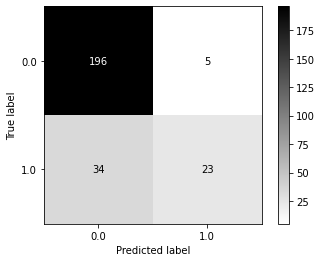

In [403]:
imp.reload(doc_utils)
doc_utils.run_classifier(merged_db)

## Create narrative DB

In [396]:
nar_db = par_db.groupby(by='nar_idx')['text'].apply(' '.join).reset_index()

In [398]:
nar_db = doc_utils.clean_text(nar_db)

./src/doc_utils.py:86: FutureWarning: The default value of regex will change from True to False in a future version.
  return df


In [399]:
par_db['block_idx'] = par_db['is_nar'].diff().ne(0).cumsum()

In [400]:
not_nar_db = par_db[par_db['is_nar']==0].groupby(by='block_idx')['text'].apply(' '.join).reset_index()

In [401]:
list(not_nar_db[not_nar_db['block_idx']==21]['text'])

['אבל אני חושבת על המקום שלך שצריך חופש בתוך מערכת יחסים  אני כן אני מזל קשת אני חייב את זה שמה זה החופש הזה מה זה אומר בעצם זה לאו דווקא ללכת ו לפתוח את המערכת יחסים כמו שהרבה אנשים עושים זה אם זה לצאת למסיבה זה בא לי לצאת לבד לא בא לי לצאת איתך בא לי להיות איתך בהרבה דברים אחרים אבל אם אני רוצה לצאת למסיבה ספציפית בא לי להיות עם חברים שלי אני הרבה יותר משוחרר כשאני עם חברים שלי לבד כן כי אתה לוקח לי את כל האנרגיה במסיבה ומחפש את זה שאני כל הזמן אהיה רק איתך כאילו צריך לדאוג לו צריךלראות מה קורה איתו כן אתה תרצה עכשיו וודקה רד בול ואתה תרצה זה ואתה תרצה זה ואתה תרצה שאני אחבק אותך ואתה ואני לא אוהב להיות כאילו מול כל כך הרבה אנשים שאני כל הזמן איתך  כאילו אתה צריך להיות בתפקיד מולו יש תפקיד מולו כן תפקיד הבן זוג שכל הזמן עוטף כאילו יכול להיות שאם זה היה בן זוג אחר בן זוג שנורא משוחרר ועצמאי כאילו ויכול להיות במסיבה הזאת עם עצמו אז יכול להיות שלא היה אכפת לך שהוא יהיה שם נכון נכון לגמרי אפשר גם להיות במצבים כאלה איתו זה לא  כן אבל אני מאוד יכולה לראות את הרצון שלך להיות בתוך מערכת יחסי

In [402]:
not_nar_db['is_nar'] = 0

In [403]:
nar_db['is_nar'] = 1

In [404]:
mixed_nar_db = not_nar_db.append(nar_db,ignore_index=True)

In [405]:
mixed_nar_db.drop(['block_idx','nar_idx'],axis=1,inplace=True)

In [406]:
mixed_nar_db

,text,is_nar
0,CLIENT THERAPIST התחל שפה עב משתתפים קליינט...,0
1,כן כן אולי זה דווקא טוב אולי אני אשלח עוד קצת ...,0
2,כן ברור אבל אין מה לעשות עשיתי טעות למה טעות כ...,0
3,דקה 10 – סגמנט 3,0
4,מעניין אני תוהה למה כאילו על כאילו כמה זה מבי...,0
5,אני לא יודעת אתה שאלנו את זה כבר נראה לי בעבר ...,0
6,מה מה מה יקרה אם מישהו ישים עליך כסף XXX לא...,0
7,דקה 30 – סגמנט 7,0
8,מה היה גורם הקנאה הזאת היה כאילו ריבים סביבה כ...,0
9,שמה מממ הייתי מקריא לך את זה עכשיו אם הייתי מו...,0


total data len: 49
len train: 36, len test: 13
['10', 'xxx', 'אה', 'אומרת', 'אוקיי', 'איזו', 'איזשהו', 'איתם', 'אליו', 'אליי', 'אמ', 'אממ', 'אמרו', 'אמרת', 'אמרתי', 'באיזה', 'בחברה', 'בחיים', 'בטח', 'ביחד']
['וואי', 'וואלה', 'וזהו', 'וכאילו', 'זהו', 'זוכר', 'חברה', 'חברים', 'חודשיים', 'ידעתי', 'ילד', 'יצא', 'ישבתי', 'כאילו', 'לאו', 'לאמא', 'לבמט', 'להבין', 'לילה', 'למצב']
['10', 'אממ', 'בעבר', 'היית', 'וואו', 'ילד', 'לצאת', 'מכיר', 'נשמע', 'צוחק']


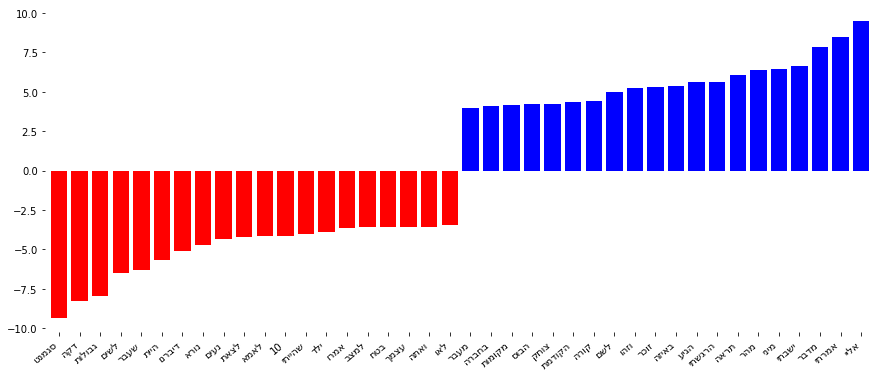

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      1.00      0.86         3

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13



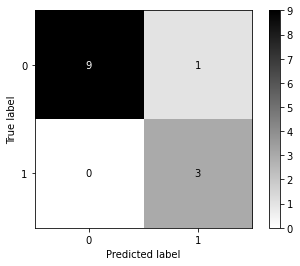

In [408]:
doc_utils.run_model(mixed_nar_db)

In [412]:
doc_utils.show_data_basic_information(doc_db)

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   path           3 non-null      object
 1   file_name      3 non-null      object
 2   client_tag     3 non-null      object
 3   therapist_tag  3 non-null      object
 4   num_par        3 non-null      object
dtypes: object(5)
memory usage: 252.0+ bytes
None

**********

Shape

(3, 5)

**********

Amount of is null data

0

**********

Describe



,path,file_name,client_tag,therapist_tag,num_par
count,3,3,3,3,3
unique,3,3,3,3,3
top,tmp/nun2_l.docx,aingimel3_l.docx,נקל,נמט,229
freq,1,1,1,1,1



**********



In [413]:
doc_utils.show_data_basic_information(par_db)

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 844
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   doc_idx     845 non-null    float64
 1   text        845 non-null    object 
 2   par_type    845 non-null    object 
 3   is_nar      845 non-null    float64
 4   nar_idx     159 non-null    float64
 5   nar_len     157 non-null    float64
 6   idx_in_nar  159 non-null    float64
 7   par_len     845 non-null    int64  
 8   block_idx   845 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 98.3+ KB
None

**********

Shape

(845, 9)

**********

Amount of is null data

688

**********

Describe



,doc_idx,is_nar,nar_idx,nar_len,idx_in_nar,par_len,block_idx
count,845.000000,845.000000,159.000000,157.000000,159.000000,845.000000,845.000000
mean,0.738462,0.188166,4.113208,6.579618,8.496855,84.344379,28.520710
std,0.857915,0.391076,3.219759,5.398394,10.939925,173.100835,19.196937
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,1.000000,10.000000,13.000000
50%,0.000000,0.000000,4.000000,4.000000,4.000000,32.000000,23.000000
75%,2.000000,0.000000,6.000000,9.000000,10.500000,86.000000,43.000000
max,2.000000,1.000000,12.000000,17.000000,43.000000,1841.000000,71.000000



**********



## Initial processing:
- drop 'Unnamed 0' column
- encode author_gender
- add feature - length of the narrative
- (?) - replace birth year with age

In [ ]:
def encode_gender(_df):
    df = _df.copy()
    man = "זכר"
    woman = "נקבה"
    gender = {man: 0, woman: 1}
    df['author_gender'] = [gender[item] for item in df['author_gender']]
    return df

In [ ]:
def add_length_of_narrative(_df):
    df = _df.copy()
    df['nar_length'] = df['narrative'].str.len()
    return df

In [ ]:
# def convert_year_to_age(_df):
#     df = _df.copy()
#     df['nar_length'] = df['narrative'].str.len()
#     return df

In [ ]:
df_steps['1_dropped'] = drop_columns(df_steps['0_full_df'],['Unnamed: 0'])
df_steps['2_gender'] = encode_gender(df_steps['1_dropped'])
df_steps['3_nar_length'] = add_length_of_narrative(df_steps['2_gender'])
df_steps['3_nar_length']

- Plot see the distribution of the data

In [ ]:
sns.pairplot(df_steps['3_nar_length'], hue='label')

In [ ]:
sns.countplot(x='label',data=df_steps['3_nar_length'])
plt.title('Class Distributions \n (0: False || 1: True)', fontsize=14)

In [ ]:
show_random_text(df_steps['3_nar_length'],'narrative',2)

## Conclustion from step 1
- data is balanced
- there is no significant differences between features distribution per label
- narrative has to be cleaned from \n

In [ ]:
df_steps['4_clean_nar'] = df_steps['3_nar_length']
df_steps['4_clean_nar']['narrative'] = df_steps['4_clean_nar']['narrative'].replace(b"<br />", b" ")
df_steps['4_clean_nar']['narrative'] = df_steps['4_clean_nar']['narrative'].replace("n\\",' ')

In [ ]:
show_random_text(df_steps['4_clean_nar'],'narrative',2)

## Step 2 - tokenize the narrative
exaustive search for the best model

In [ ]:
text_train = df_steps['4_clean_nar']['narrative'].tolist()
y_train = df_steps['4_clean_nar']['label']

In [ ]:
text_train

In [ ]:
vect = CountVectorizer(min_df=4)
X_train = vect.fit_transform(text_train)
X_train

In [ ]:
#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:10])
print(feature_names[20000:20020])
print(feature_names[::2000])

In [ ]:
lr = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
lr.score(X_train,y_train)

In [ ]:
regressors = [
    LogisticRegression(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SGDClassifier()
]
scores_df = pd.DataFrame(dtype=float)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"count_vectorizer")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
#TfidfVectorizer
tdif = TfidfVectorizer(min_df=4)
X_train = tdif.fit_transform(text_train)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"TfidfVectorizer")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
# L1 normalization with CountVectorizer
count_vec = CountVectorizer(min_df=4)
X_train = count_vec.fit_transform(text_train)
X_train = normalize(X_train,norm="l1")

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"TfidfVectorizer_norm")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
#ngrams
ngrm = CountVectorizer(ngram_range=(1, 3), min_df=4)
X_train = ngrm.fit_transform(text_train)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"ngrm")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
cv = CountVectorizer(ngram_range=(1, 3), analyzer="char_wb")
X_train = cv.fit_transform(text_train)
print(f"vocaulary size:{len(cv.vocabulary_)}")

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"_char_wb")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

Get an impression of data by looking at most important features

In [ ]:
tdif = TfidfVectorizer(stop_words='english',min_df=4)
X_train = tdif.fit_transform(text_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

In [ ]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(tdif.get_feature_names()), top_n=20, rotation=40)
ax = plt.gca()
plt.show()

In [ ]:
X,y=get_label_and_drop(df_steps['4_clean_nar'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101,stratify=y)

In [ ]:
def get_num_text_pipeline(df,regr_num,regr_text):
    numeric_cols = X_train.columns[X_train.columns.dtype != object].tolist()
    
    transformer_text = FunctionTransformer(lambda x: x['narrative'], validate=False)
    transfomer_numeric = FunctionTransformer(lambda x: x[numeric_cols], validate=False)

    pipeline = Pipeline([
        ('features', FeatureUnion([
                ('numeric_features', Pipeline([
                    ('selector', transfomer_numeric)
                ])),
                 ('text_features', Pipeline([
                    ('selector', transformer_text),
                    (regr_text.__class__.__name__, regr_text)
                ]))
             ])),
        ('estimator', regr_num)
    ])
    return pipeline

In [ ]:
regr_text = TfidfVectorizer(min_df=4)

for regr in regressors:
    pipe = get_num_text_pipeline(X_train,regr,regr_text)
    get_cross_val_score(scores_df,pipe, X_train, y_train,regr_text.__class__.__name__+"_combined")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

meantime combined featues haven't improved the results so far...

## spaCy

In [ ]:
import spacy # is it relevant for hebrew? TBD check what we saw on a class on hebrew

In [ ]:
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner","lemmatizer"])